# k近邻算法（KNN）

定义：根据样本附近K个已知分类点进行投票判别，即数量最多的分类点的分类标签判定给新的样本。

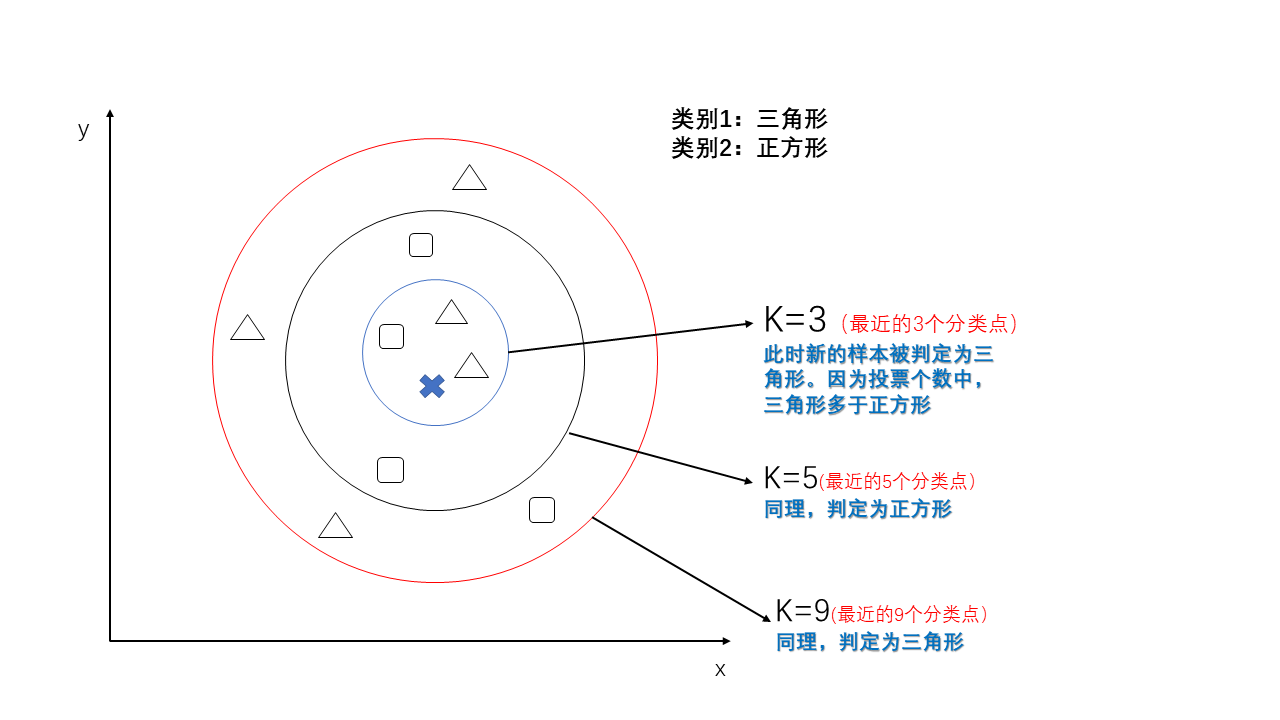

优点：精度高、对异常值不敏感、无数据输入假定

缺点：计算复杂度高、空间复杂度高，<span class="girk">当数据集较大时，训练时间较长</span>

适用数据范围：数值型和标称型


In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.metrics import classification_report

In [54]:
model=load_iris()

In [55]:
data=model.data
labels=model.target

In [56]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2)

<span class="burk">KNN底层算法</span>

In [57]:
def Knn(train,test,train_labels,k):#只验证单个样本的测试集
    distance=np.linalg.norm(train-test,ord=2,axis=1)#用norm函数求出距离
    data_concat=np.c_[train,train_labels,distance]#合并距离然后进行大小排序
    data_concat=data_concat[data_concat[:,-1].argsort()]#将距离排序并返回他的索引
    k_sample=data_concat[:k,:]#取邻近k个样本点
    category_dict=dict(Counter(k_sample[:,-2]))#用Counter计算分类的个数
    for keys,val in category_dict.items():
        if val==max(category_dict.values()):#循环判定最大值
            cat_sample=keys
    return cat_sample
#这里的train包含了feature
#这里的test只有feature
def test_sample(train,test,train_labels,k):#循环测试集
    pred=np.zeros((test.shape[0],1))
    for i in range(len(test)):
        pred[i]=Knn(train,test[i,:],train_labels,k)
    return pred

y_test_pred=test_sample(x_train,x_test,y_train,10)
classification_report(y_test,y_test_pred.ravel().astype(int))

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      0.75      0.86        12\n           2       0.80      1.00      0.89        12\n\n    accuracy                           0.90        30\n   macro avg       0.93      0.92      0.92        30\nweighted avg       0.92      0.90      0.90        30\n'

因为这里的recall,precision,f1-score都很高了，我就不用<span class="mark">gridsearch</span>去寻找最优值。

缺点：没有保持分类数的平衡性，应该采用<span class="mark">下采样/上采样</span>的方式，<span class="mark">让表中support数量一致</span>

# 随机挑选两个特征进行lmplot可视化

import seaborn
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')
feature=model.feature_names[:2]
df=pd.DataFrame(x_train[:,:2],columns=feature)
df=df.assign(target=y_train)#对训练集进行可视化

<Figure size 7200x4800 with 0 Axes>

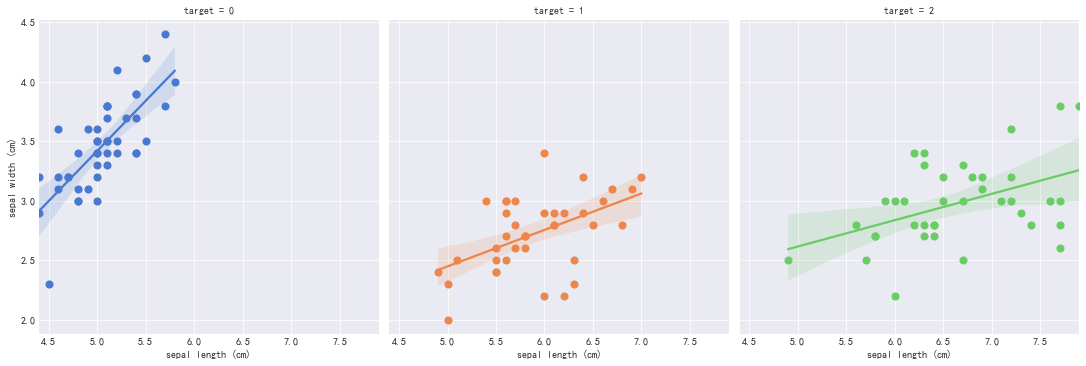

In [79]:
plt.figure(figsize=(12,8),dpi=600)
seaborn.lmplot(data=df,x='sepal length (cm)',y='sepal width (cm)',hue='target',col='target',palette='muted',
               ci=95,scatter_kws={'s':50,'alpha':1})
#hue、col为依据哪一列分类，palette为颜色，ci指在多少的置信区间下，即图中的阴影部分